In [1]:
import numpy
import matplotlib.pyplot as plt

def pbc(d,L):
  for i,x in enumerate(d):
    if x > L/2:
      d[i] = x-L
    elif x <= -L/2:
      d[i] = x+L
  return d

def distance(ri,rj,L):
  d = pbc(rj-ri,L)
  return numpy.linalg.norm(d)

def lj(r,epsilon=1.,sigma=1.):
  return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

class simulation():
  def __init__(self,N=100,L=10,T=1.,maxD=0.1,maxSteps=10,debug=False,seed=2):
    numpy.random.seed(seed)
    self.N = N
    self.L = L
    self.T = T
    self.maxD = maxD
    self.accept = 0
    self.reject = 0
    self.rcut = 2.5
    self.pos = numpy.zeros((N,3))
    self.debug = debug
    self.maxSteps = maxSteps
    self.energies = numpy.zeros(maxSteps)
    for i in range(self.N):
      while True:
        self.pos[i] = numpy.random.uniform(low=-L/2,high=L/2,size=3)
        if self.energy(i,initializing=True)<=0.:
          break
    self.E = self.energy()
    for i in range(self.maxSteps):
      self.trial()
      if self.debug:
        print("{:03}:   {:.2f}".format(i, self.E))
      self.energies[i] = self.E

  def energy(self,i=None,initializing=False):
    E = 0
    if i is not None and initializing:
      pi = self.pos[i]
      for j in range(i):
        r = distance(pi,self.pos[j],self.L)
        if r <= self.rcut:
          E += lj(r)
      return E
    if i is None:
      for i in range(self.N-1):
        pi = self.pos[i]
        for j in range(i+1,self.N):
          r = distance(pi,self.pos[j],self.L) # speed up with numpy
          if r <= self.rcut:
            E += lj(r)
      return E

  def trial(self):
    i = numpy.random.randint(self.N)
    oldP = numpy.copy(self.pos[i])
    oldE = self.E
    oldEi = self.energy()
    d = numpy.random.uniform(low=-self.maxD,high=self.maxD,size=3)
    newP = pbc(oldP+d,self.L)
    self.pos[i] = newP
    newEi = self.energy()
    dE = newEi - oldEi
    if numpy.random.uniform() <= numpy.exp(-dE/self.T):
      if self.debug:
        print("accept")
      self.accept += 1
      self.E += dE
      return
    else:
      if self.debug:
        print("reject")
      self.pos[i] = oldP
      self.reject += 1
      self.E = oldE
      return

In [2]:
density = 0.7
N = 28
V = N/density
L = V**(1/3)
print(L)
maxSteps = 10000
s = simulation(N=N, L=L, maxSteps = maxSteps,debug=False)

3.4199518933533937


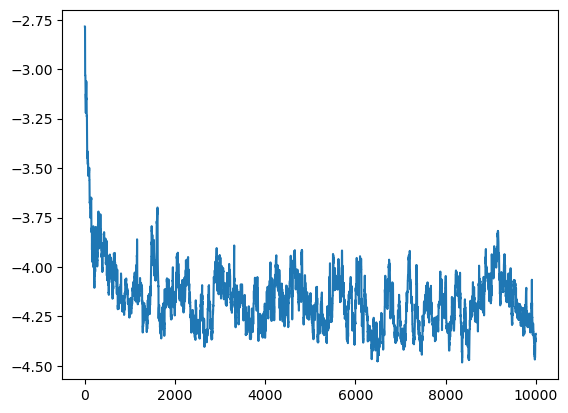

N=28, AverageE: -4.21


In [3]:
start = 0
steps = maxSteps
plt.plot(range(start,start+steps),s.energies[start:start+steps]/N)
plt.show()
print("N={}, AverageE: {:.2f}".format(N,s.energies[maxSteps//2:].mean()/N))
# per particle around -4.25 with  N=32, density .7, L=3.57, 10k maxSteps
# per particle around -3.91 with  N=20, density .7, L=3.057, 10k maxSteps
# per particle around  with  N=28, density .7, L=3.057, 10k maxSteps


In [8]:
for N in range(20,51,5):
  density = 0.5
  V = N/density
  L = V**(1/3)
  maxSteps = 10000
  s = simulation(N=N, L=L, maxSteps = maxSteps,debug=False)
  print("N={}, AverageE: {:.2f}".format(N,s.energies[maxSteps//2:].mean()/N))

N=20, AverageE: -2.98
N=25, AverageE: -3.12
N=30, AverageE: -3.10
N=35, AverageE: -3.08
N=40, AverageE: -3.22
N=45, AverageE: -3.15
N=50, AverageE: -3.26


In [5]:
import time
for N in range(20,51,5):
    density = 0.7
    V = N/density
    L = V**(1/3)
    maxSteps = 10000
    t1 = time.perf_counter()
    s = simulation(N=N, L=L, maxSteps = maxSteps,debug=False)
    t2 = time.perf_counter()
    print("\nN=",N,"; {:.2f} seconds/sim".format(t2-t1))
    print("N={}, AverageE: {:.2f}".format(N,s.energies[maxSteps//2:].mean()/N))

N=20, AverageE: -3.91
N=25, AverageE: -4.13
N=30, AverageE: -4.22
N=35, AverageE: -4.35
N=40, AverageE: -4.35
N=45, AverageE: -4.47
N=50, AverageE: -4.39
